In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import discopy.util as util
# import discopy.plot as plot
# import discopy.geom as geom
from pathlib import Path
plt.style.use('ggplot')
import pandas as pd

In [2]:
report_path = '/gpfs/hsu/BH_disco_runs/0721cb_ecc0p4_1000_orbits/report.dat'
checkpoint_root = Path('/gpfs/hsu/BH_disco_runs/0721cb_ecc0p4_1000_orbits')
plot_dir = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/0721cb_ecc0p4_1000_orbits'
report = np.loadtxt(report_path)

In [3]:
# After changing snapshots
t = report[:,0]
mass = report[:,1]
energy = report[:,2]
radial_momentum = report[:,3]
angular_momentum = report[:,4]
vertical_momentum = report[:,5]
passive_scalar = report[:,6]
M1 = report[:,7]
M2 = report[:,8]
r1 = report[:,9]
r2 = report[:,10]
phi1 = report[:,11]
phi2 = report[:,12]
vr1 = report[:,13]
vr2 = report[:,14]
vphi1 = report[:,15]
vphi2 = report[:,16]
dM1 = report[:,17]
dM2 = report[:,18]
dJz_grv1 = report[:,19]
dJz_grv2 = report[:,20]
dJz_snk1 = report[:,21]
dJz_snk2 = report[:,22]
dPx_grv1 = report[:,23]
dPx_grv2 = report[:,24]
dPy_grv1 = report[:,25]
dPy_grv2 = report[:,26]
dPx_snk1 = report[:,27]
dPx_snk2 = report[:,28]
dPy_snk1 = report[:,29]
dPy_snk2 = report[:,30]
dK_grv1 = report[:,31]
dK_grv2 = report[:,32]
dK_snk1 = report[:,33]
dK_snk2 = report[:,34]
dMx_snk1 = report[:,35]
dMx_snk2 = report[:,36]
dMy_snk1 = report[:,37]
dMy_snk2 = report[:,38]
dSz_snk1 = report[:,39]
dSz_snk2 = report[:,40]
dU_grv1 = report[:,41]
dU_grv2 = report[:,42]
dU_snk1 = report[:,43]
dU_snk2 = report[:,44]
dLz_snk1 = report[:,45]
dLz_snk2 = report[:,46]
dUgas_snk1 = report[:,47]
dUgas_snk2 = report[:,48]


In [4]:
# t = dat[:,0]
# mass = dat[:,1]
# energy = dat[:,2]
# radial_momentum = dat[:,3]
# angular_momentum = dat[:,4]
# vertical_momentum = dat[:,5]
# passive_scalar = dat[:,6]
# M1 = dat[:,7]
# M2 = dat[:,8]
# r1 = dat[:,9]
# r2 = dat[:,10]
# phi1 = dat[:,11]
# phi2 = dat[:,12]
# dM1 = dat[:,13]
# dM2 = dat[:,14]
# dJz_grv1 = dat[:,15]
# dJz_grv2 = dat[:,16]
# dJz_snk1 = dat[:,17]
# dJz_snk2 = dat[:,18]
# dPx_grv1 = dat[:,19]
# dPx_grv2 = dat[:,20]
# dPy_grv1 = dat[:,21]
# dPy_grv2 = dat[:,22]
# dPx_snk1 = dat[:,23]
# dPx_snk2 = dat[:,24]
# dPy_snk1 = dat[:,25]
# dPy_snk2 = dat[:,26]
# dK_grv1 = dat[:,27]
# dK_grv2 = dat[:,28]
# dK_snk1 = dat[:,29]
# dK_snk2 = dat[:,30]
# dMx_snk1 = dat[:,31]
# dMx_snk2 = dat[:,32]
# dMy_snk1 = dat[:,33]
# dMy_snk2 = dat[:,34]
# dSz_snk1 = dat[:,35]
# dSz_snk2 = dat[:,36]
# dU_grv1 = dat[:,37]
# dU_grv2 = dat[:,38]
# dU_snk1 = dat[:,39]
# dU_snk2 = dat[:,40]

In [5]:
G = 1
# dE1 = dU_grv1 + dK_grv1 + dU_snk1 + dK_snk1
# dE2 = dU_grv2 + dK_grv2 + dU_snk2 + dK_snk2
# dE = dE1 + dE2
dE = dK_grv1 + dK_grv2 + dK_snk1 + dK_snk2 
Edot = dE / (t[1] - t[0])

dJ1 = dJz_grv1 + dJz_snk1
dJ2 = dJz_grv2 + dJz_snk2
dJ = dJ1 + dJ2
Jdot = dJ / (t[1] - t[0])

M1dot = dM1 / (t[1] - t[0])
M2dot = dM2 / (t[1] - t[0])

phi1dot = (phi1[1] - phi1[0]) / (t[1] - t[0])
phi2dot = (phi2[1] - phi2[0]) / (t[1] - t[0])
J1 = M1 * r1**2 * phi1dot
J2 = M2 * r2**2 * phi2dot
J = J1 + J2
v1_sqared = r1**2 * phi1dot**2
v2_sqared = r2**2 * phi2dot**2
x1 = r1 * np.cos(phi1)
x2 = r2 * np.cos(phi2)
y1 = r1 * np.sin(phi1)
y2 = r2 * np.sin(phi2)
r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

K1 = 0.5 * M1 * v1_sqared 
K2 = 0.5 * M2 * v2_sqared 
U = -G * M1 * M2 / r
E = K1 + K2 + U



# Compute a dot
a = 1
adot = a * (M1dot / M1 + M2dot / M2 - Edot / E)
e = np.sqrt(1 + 2 * E * J**2 * (M1 + M2) / (G**2 * M1**3 * M2**3))
edot = 1 / (G**2 * M1**6 * M2**6 * e) *  (M1**3 * M2**3 * E * J**2 * (M1dot + M2dot) + (M1 + M2) * 
    (Edot * J**2 - 2 * E * J * Jdot) - E * J**2 * (M1 + M2) * (3 * M1**2 * M1dot * M2**3 + 3 * M2**2 * M2dot * M1**3))

In [9]:
edot

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
330506    inf
330507    inf
330508    NaN
330509    NaN
330510    NaN
Length: 330511, dtype: float64

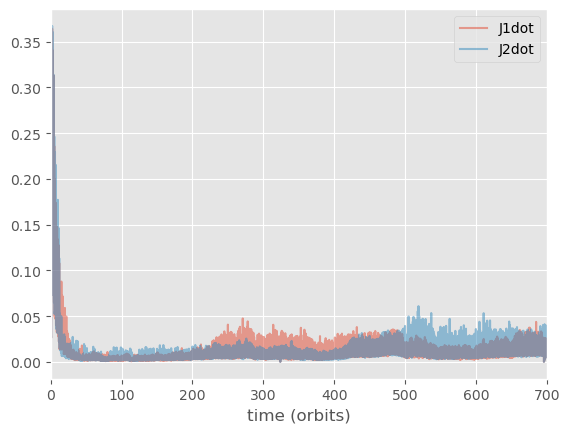

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(t / ( 2 * np.pi), dJz_snk1/ (t[1] - t[0]), label = 'J1dot', alpha = 0.5)
ax.plot(t / ( 2 * np.pi), dJz_snk2/ (t[1] - t[0]), label = 'J2dot', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), dU_snk1, label = 'dU_snk1', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), dU_snk2, label = 'dU_snk2', alpha = 0.5)
# ax.set_ylabel('e')
ax.set_xlabel('time (orbits)')
ax.set_xlim(0, 700)
fig.savefig(plot_dir + 'Jdot_snk')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

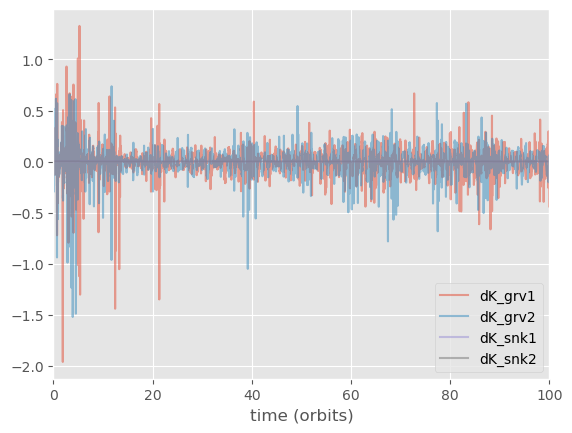

In [35]:
fig, ax = plt.subplots(1, 1)
ax.plot(t / ( 2 * np.pi), dK_grv1, label = 'dK_grv1', alpha = 0.5)
ax.plot(t / ( 2 * np.pi), dK_grv2, label = 'dK_grv2', alpha = 0.5)
ax.plot(t / ( 2 * np.pi), dK_snk1, label = 'dK_snk1', alpha = 0.5)
ax.plot(t / ( 2 * np.pi), dK_snk2, label = 'dK_snk2', alpha = 0.5)
# ax.set_ylabel('e')
ax.set_xlabel('time (orbits)')
ax.set_xlim(0, 100)
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

In [31]:
(Edot / E).mean()

133.58293208082594

In [6]:
# # Check reuslt for a dot and e dot using edot = 0
# Edot_test1 = (E * J**2) * (2 * M1 * M2 * (M1dot + M2dot)  + (M1dot * M2**2 + M1**2 * M2dot)) / (M1**2 * M2 + M1 * M2**2) / J**2 - 2 * Jdot * E / J
# adot_test1 = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot_test1 / E**2)

# # Check using e = 0
# E_test2 = G**2 * M1 * M2 * (M1 + M2) / (-2 * J**2)
# adot_test2 = -G/2 * ((M1dot * M2 + M1 * M2dot) / E_test2 - M1 * M2 * Edot_test1 / E_test2**2)

In [25]:
# Check adot using e = 0
# Check Edot edot = 0
# Edot_test = (E * J**2) * (2 * M1 * M2 * (M1dot + M2dot)  + (M1dot * M2**2 + M1**2 * M2dot)) / (M1**2 * M2 + M1 * M2**2) / J**2 - 2 * Jdot * E / J
E_test = 
a_test = 
adot_test = a_test * (M1dot/M1 + M2dot/M2 - Edot/E_test)

In [39]:
a_test2 = J**2 * (M1 + M2) / (G * M1**2 * M2**2)
adot_test2 = a_test2 * ((M1dot + M2dot) / (M1 + M2) - 2 * M1dot / M1 - 2 * M2dot / M2 + 2 * Jdot / J)

In [40]:
# r = r2 - r1
# phi = phi2 + phi1
# rdot = (r[1] - r[0]) / (t[1] - t[0])
# phidot = (phi[1] - phi[0]) / (t[1] - t[0])
# rx = r * np.cos(phi)
# ry = r * np.sin(phi)
# ex = (rdot**2 * rx + rx**2 * phidot**2 * rx) / (G * (M1 + M2)) + (rdot * rx + rx**2 * phidot) * (rdot + rx * phidot) / (G * (M1 + M2))
# ey = (rdot**2 * ry + ry**2 * phidot**2 * ry) / (G * (M1 + M2)) + (rdot * ry + ry**2 * phidot) * (rdot + ry * phidot) / (G * (M1 + M2))

In [41]:
# fig, ax = plt.subplots(1, 1)
# # ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
# ax.plot(t / ( 2 * np.pi), ex, label='ex', alpha=0.7) 
# ax.plot(t / ( 2 * np.pi), ey, label='ey', alpha=0.7)
# ax.set_ylabel('e')
# ax.set_xlabel('time (orbits)')
# # fig.savefig(plot_dir + 'dJz_snk_avg')
# plt.legend()
# plt.show()
# plt.close(fig) #delete figure from memory

NameError: name 'adot_test2' is not defined

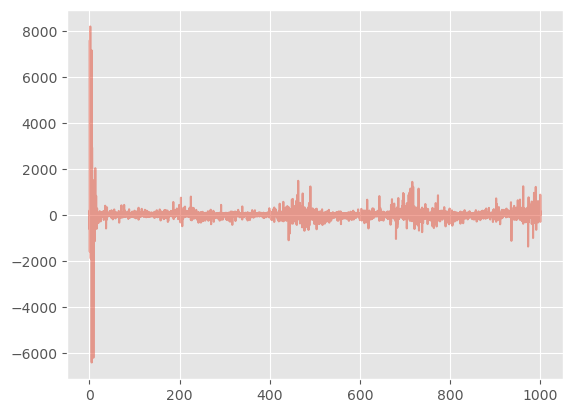

In [7]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), adot, label='adot', alpha=0.5) 
ax.plot(t / ( 2 * np.pi), adot_test2, label='adot_test2', alpha=0.5)
# ax.plot(t / ( 2 * np.pi), adot - adot_test2, label='adot_test2', alpha=0.5)
ax.set_ylabel('adot')
ax.set_xlabel('time (orbits)')
# ax.set_ylim(-1000, 100)
ax.set_xlim(0, 100)
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

In [27]:
# fig, ax = plt.subplots(1, 1)
# # ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
# ax.plot(t / ( 2 * np.pi), adot, label='adot', alpha=0.7) 
# ax.plot(t / ( 2 * np.pi), adot_test2, label='adot_test2', alpha=0.7)
# ax.set_ylabel('adot')
# ax.set_xlabel('time (orbits)')
# # fig.savefig(plot_dir + 'dJz_snk_avg')
# plt.legend()
# plt.show()
# plt.close(fig) #delete figure from memory

In [81]:
# t_step = 250
# adot_avg = avg_time_period(adot, t_step)
# edot_avg = avg_time_period(edot, t_step)
# radial_momentum_avg = avg_time_period(radial_momentum, t_step)
# angular_momentum_avg = avg_time_period(angular_momentum, t_step)
# dM1_avg = avg_time_period(dM1, t_step)
# dM2_avg = avg_time_period(dM2, t_step)
# dJz_grv1_avg = avg_time_period(dJz_grv1, t_step)
# dJz_grv2_avg = avg_time_period(dJz_grv2, t_step)
# dJz_snk1_avg = avg_time_period(dJz_snk1, t_step)
# dJz_snk2_avg = avg_time_period(dJz_snk2, t_step)

In [10]:
t_step = 500
t_step_2 = 5000
adot_df = pd.DataFrame({'adot': adot})
edot_df = pd.DataFrame({'edot': edot})
dM1_df = pd.DataFrame({'dM1': dM1})
dM2_df = pd.DataFrame({'dM2': dM2})
dJz_grv1_df = pd.DataFrame({'dJz_grv1': dJz_grv1})
dJz_grv2_df = pd.DataFrame({'dJz_grv2': dJz_grv2})
dJz_snk1_df = pd.DataFrame({'dJz_snk1': dJz_snk1})
dJz_snk2_df = pd.DataFrame({'dJz_snk2': dJz_snk2})
adot_avg = adot_df['adot'].rolling(t_step).mean()
edot_avg = edot_df['edot'].rolling(t_step).mean()
dM1_avg = dM1_df['dM1'].rolling(t_step).mean()
dM2_avg = dM2_df['dM2'].rolling(t_step).mean()
dJz_grv1 = dJz_grv1_df['dJz_grv1'].rolling(t_step).mean()
dJz_grv2 = dJz_grv2_df['dJz_grv2'].rolling(t_step).mean()
dJz_snk1 = dJz_snk1_df['dJz_snk1'].rolling(t_step).mean()
dJz_snk2 = dJz_snk2_df['dJz_snk2'].rolling(t_step).mean()


Mdot = pd.DataFrame({'Mdot': (dM1 + dM2) / (t[1] - t[0])})
Jdot_grv = pd.DataFrame({'Jdot': (dJz_grv1 + dJz_grv2) / (t[1] - t[0])})
Jdot_snk = pd.DataFrame({'Jdot': (dJz_snk1 + dJz_snk2) / (t[1] - t[0])})
Mdot_avg = Mdot['Mdot'].rolling(t_step).mean()
Mdot_avg_2 = Mdot['Mdot'].rolling(t_step_2).mean()
Jdot_grv_avg = Jdot_grv['Jdot'].rolling(t_step).mean()
Jdot_grv_avg_2 = Jdot_grv['Jdot'].rolling(t_step_2).mean()
adot_avg_2 = adot_df['adot'].rolling(t_step_2).mean()
edot_avg_2 = edot_df['edot'].rolling(t_step_2).mean()



In [12]:
len(angular_momentum)

100001

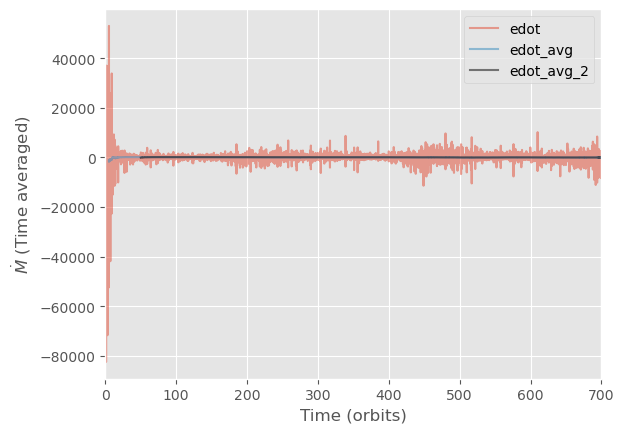

In [9]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), passive_scalar)
ax.plot(t / ( 2 * np.pi), edot,label='edot', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), edot_avg,label='edot_avg', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), edot_avg_2, label='edot_avg_2', alpha = 0.5, color='black')
# ax.plot(t / ( 2 * np.pi), (dM2_avg )/(t[1] - t[0]), label='BH 2', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
# ax.set_ylim(0, 0.3)
ax.set_xlim(0, 700)
ax.set_ylabel(r'$\dot M$ (Time averaged)')
ax.set_xlabel('Time (orbits)')
plt.legend()
plt.show()
fig.savefig(plot_dir + 'edot')
plt.close(fig) #delete figure from memory

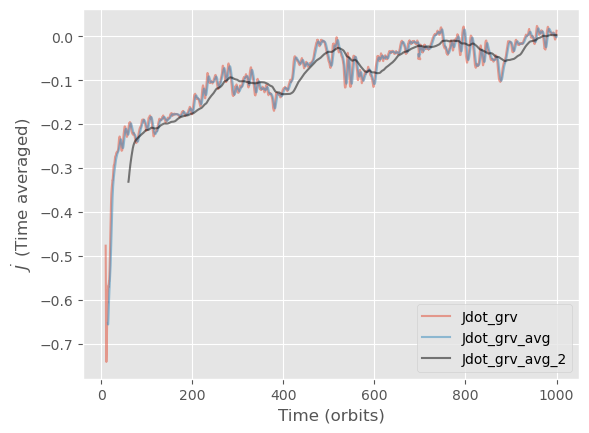

In [12]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), passive_scalar)
ax.plot(t / ( 2 * np.pi), Jdot_grv,label='Jdot_grv', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), Jdot_grv_avg,label='Jdot_grv_avg', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), Jdot_grv_avg_2, label='Jdot_grv_avg_2', alpha = 0.5, color='black')
# ax.plot(t / ( 2 * np.pi), (dM2_avg )/(t[1] - t[0]), label='BH 2', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
# ax.set_ylim(0, 0.3)
# ax.set_xlim(0, 700)
ax.set_ylabel(r'$\dot J$ (Time averaged)')
ax.set_xlabel('Time (orbits)')
plt.legend()
plt.show()
fig.savefig(plot_dir + 'Jdot_snk')
plt.close(fig) #delete figure from memory

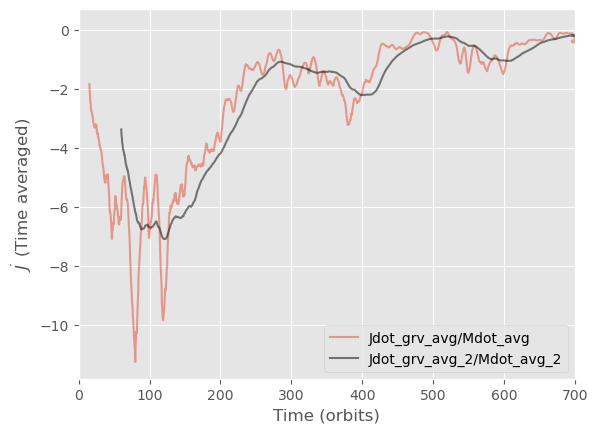

In [13]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), passive_scalar)
# ax.plot(t / ( 2 * np.pi), Jdot_grv/Mdot,label='Jdot_grv/Mdot', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), Jdot_grv_avg/Mdot_avg,label='Jdot_grv_avg/Mdot_avg', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), Jdot_grv_avg_2/Mdot_avg_2, label='Jdot_grv_avg_2/Mdot_avg_2', alpha = 0.5, color='black')
# ax.plot(t / ( 2 * np.pi), (dM2_avg )/(t[1] - t[0]), label='BH 2', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
# ax.set_ylim(0, 0.3)
ax.set_xlim(0, 700)
ax.set_ylabel(r'$\dot J$ (Time averaged)')
ax.set_xlabel('Time (orbits)')
plt.legend()
plt.show()
# fig.savefig(plot_dir + 'dJz')
plt.close(fig) #delete figure from memory

In [ ]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), passive_scalar)
# ax.plot(t / ( 2 * np.pi), (adot_avg)/(t[1] - t[0]),label='adot_avg', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), (adot)/(t[1] - t[0]), label='adot', alpha = 0.5) 
# ax.plot(t / ( 2 * np.pi), (dM2_avg )/(t[1] - t[0]), label='BH 2', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
# ax.set_ylim(-10, 10)
ax.set_ylabel(r'$\dot a$ (Time averaged)')
ax.set_xlabel('Time (orbits)')
plt.legend()
plt.show()
# fig.savefig(plot_dir + 'dJz')
plt.close(fig) #delete figure from memory

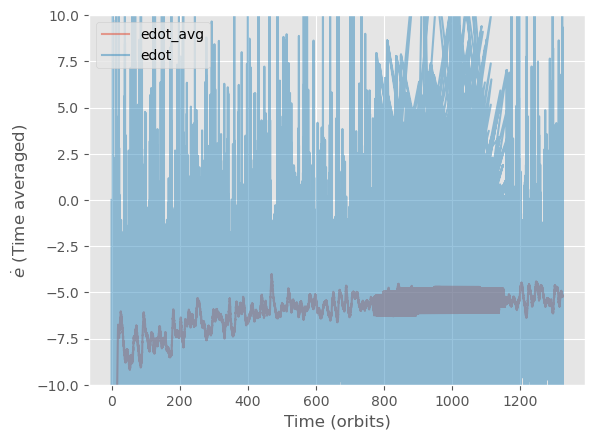

In [92]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), passive_scalar)
ax.plot(t / ( 2 * np.pi), (edot_avg)/(t[1] - t[0]),label='edot_avg', alpha = 0.5) 
ax.plot(t / ( 2 * np.pi), (edot)/(t[1] - t[0]), label='edot', alpha = 0.5) 
# ax.plot(t / ( 2 * np.pi), (dM2_avg )/(t[1] - t[0]), label='BH 2', alpha = 0.5)
# ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
ax.set_ylim(-10, 10)
ax.set_ylabel(r'$\dot e$ (Time averaged)')
ax.set_xlabel('Time (orbits)')
plt.legend()
plt.show()
# fig.savefig(plot_dir + 'dJz')
plt.close(fig) #delete figure from memory

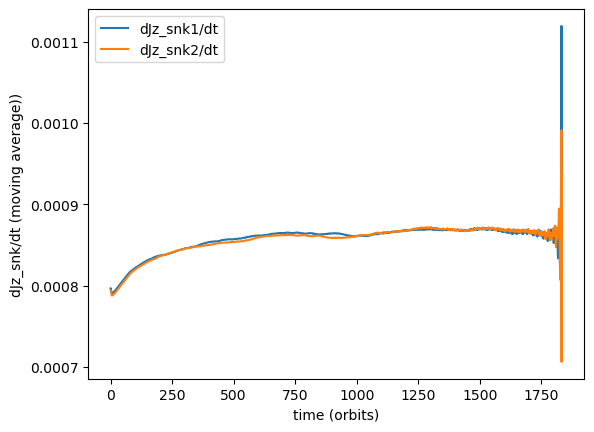

In [13]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), dJz_snk1_avg/(t[1] - t[0]), label='dJz_snk1/dt') 
ax.plot(t / ( 2 * np.pi), dJz_snk2_avg/(t[1] - t[0]), label='dJz_snk2/dt')
ax.set_ylabel('dJz_snk/dt (moving average))')
ax.set_xlabel('time (orbits)')
fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory